In [39]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [43]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [44]:
df.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,43.800000,1.600000,601.200000,0.600000,-1.020000,93.195000,-39.280000,2.397400,5118.160000,0.400000
std,10.986355,0.894427,544.711116,0.894427,1.681368,0.671577,5.937761,1.957218,95.205215,0.547723
min,28.000000,1.000000,3.000000,0.000000,-2.900000,92.201000,-47.100000,0.729000,4991.600000,0.000000
25%,39.000000,1.000000,6.000000,0.000000,-1.800000,93.075000,-42.000000,0.869000,5076.200000,0.000000
50%,44.000000,1.000000,999.000000,0.000000,-1.700000,93.200000,-39.800000,1.405000,5099.100000,0.000000
75%,53.000000,2.000000,999.000000,1.000000,-0.100000,93.444000,-36.100000,4.021000,5195.800000,1.000000
max,55.000000,3.000000,999.000000,2.000000,1.400000,94.055000,-31.400000,4.963000,5228.100000,1.000000


In [45]:
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
df.head()

KeyError: "['duration'] not found in axis"

In [46]:
df.isnull().sum()

age               1
job               1
marital           1
education         1
default           1
housing           1
loan              1
contact           1
month             1
day_of_week       1
campaign          1
pdays             1
previous          1
poutcome          1
emp_var_rate      1
cons_price_idx    1
cons_conf_idx     1
euribor3m         1
nr_employed       1
y                 1
dtype: int64

In [47]:
import seaborn as sns

<AxesSubplot:xlabel='y', ylabel='count'>

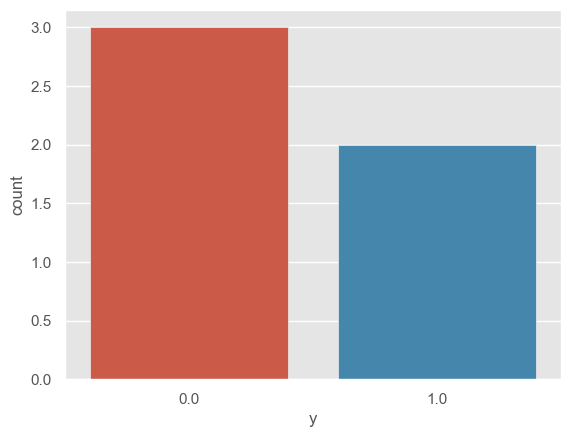

In [48]:
sns.countplot(x='y', data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

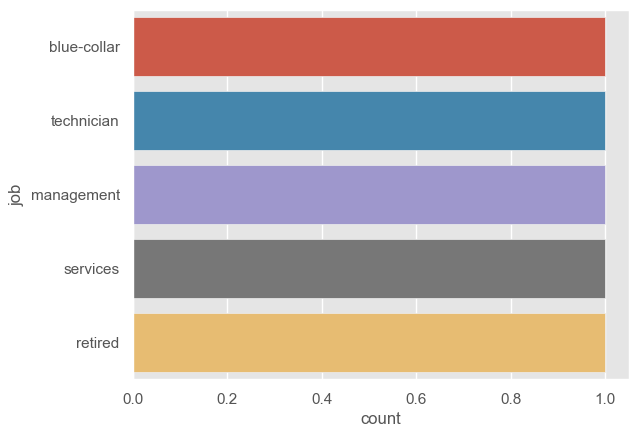

In [49]:
sns.countplot(y='job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

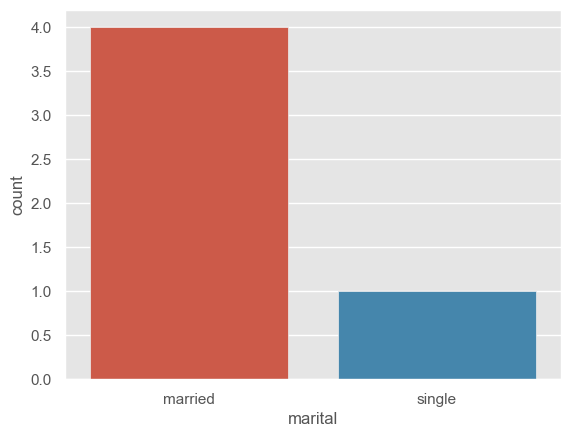

In [50]:
sns.countplot(x='marital', data=df)

In [51]:
df.education.value_counts()

basic.4y             2
unknown              1
university.degree    1
high.school          1
Name: education, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

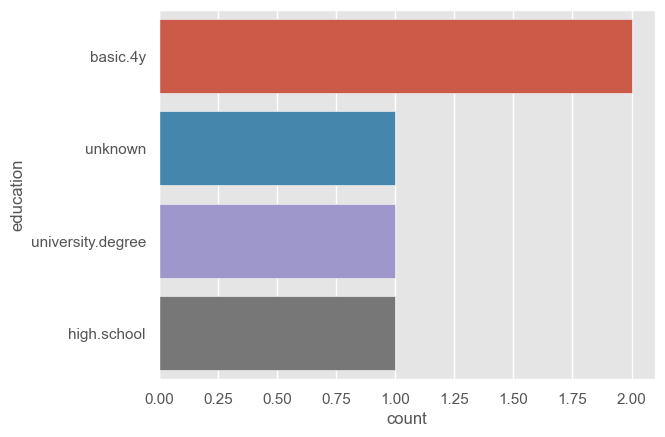

In [52]:
sns.countplot(y='education', data=df)

In [53]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53.0,technician,married,unknown,no,no,no,cellular,nov,fri,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28.0,management,single,university.degree,no,yes,no,cellular,jun,thu,3.0,6.0,2.0,success,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39.0,services,married,high.school,no,no,no,cellular,apr,fri,2.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55.0,retired,married,basic.4y,no,yes,no,cellular,aug,fri,1.0,3.0,1.0,success,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [54]:
le = preprocessing.LabelEncoder()

In [55]:
df.job = le.fit_transform(df.job)

In [56]:
df.marital = le.fit_transform(df.marital)

In [57]:
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [58]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,0,0,0,unknown,1,0,cellular,aug,thu,1.0,999.0,0.0,0,1.4,93.444,-36.1,4.963,5228.1,0.0
1,53.0,4,0,3,no,0,0,cellular,nov,fri,1.0,999.0,0.0,0,-0.1,93.200,-42.0,4.021,5195.8,0.0
2,28.0,1,1,2,no,1,0,cellular,jun,thu,3.0,6.0,2.0,1,-1.7,94.055,-39.8,0.729,4991.6,1.0
3,39.0,3,0,1,no,0,0,cellular,apr,fri,2.0,999.0,0.0,0,-1.8,93.075,-47.1,1.405,5099.1,0.0
4,55.0,2,0,0,no,1,0,cellular,aug,fri,1.0,3.0,1.0,1,-2.9,92.201,-31.4,0.869,5076.2,1.0


In [59]:
df.shape

(6, 20)

In [60]:
X = df.iloc[:,0:14]
X[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome
0,44.0,0,0,0,unknown,1,0,cellular,aug,thu,1.0,999.0,0.0,0
1,53.0,4,0,3,no,0,0,cellular,nov,fri,1.0,999.0,0.0,0
2,28.0,1,1,2,no,1,0,cellular,jun,thu,3.0,6.0,2.0,1
3,39.0,3,0,1,no,0,0,cellular,apr,fri,2.0,999.0,0.0,0
4,55.0,2,0,0,no,1,0,cellular,aug,fri,1.0,3.0,1.0,1
5,NaN,5,2,4,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,2


In [61]:
y = df.iloc[:,14]
y[0:10]

0    1.4
1   -0.1
2   -1.7
3   -1.8
4   -2.9
5    NaN
Name: emp_var_rate, dtype: float64

In [62]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0) #80/20 split

In [63]:
x_train.shape, y_train.shape

((4, 14), (4,))

In [64]:
x_test.shape, y_test.shape

((2, 14), (2,))

In [ ]:
model=LogisticRegression(penalty='l2', max_iter=1000)
model.fit(x_train, y_train)

In [ ]:
prediction=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

In [ ]:
prediction

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

In [ ]:
from sklearn.svm import SVC
clf = SVC()

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

In [ ]:
predict = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, predict)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=14, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train_keras = np.array(x_train)
y_train_keras = np.array(y_train)
#print(x_train_keras.shape)
y_train_keras = y_train_keras.reshape(y_train_keras.shape[0], 1)

In [ ]:
model.fit(np.array(x_train_keras), np.array(y_train_keras), epochs=10, batch_size=128, shuffle=True)

In [ ]:
scores = model.evaluate(np.array(x_test), np.array(y_test))

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))